# Sea ice snow layer thickness (sisnthick)

## Imports & defaults

In [1]:
import libs.analysis
import libs.plot
import libs.utils
import libs.vars
import matplotlib
import numpy as np
import xarray

matplotlib.rcParams.update({ 'font.size': 18 })

import warnings
warnings.filterwarnings('ignore')

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Data

In [2]:
path_nsidc_mask = '_data/_cache/NSIDC_Regions_Masks_Ocean_nearest_s2d.nc'
nsidc_mask = xarray.open_mfdataset(paths=path_nsidc_mask, combine='by_coords').mask
base_units = 'm'

areacello = libs.utils.get_data('Ofx', 'piControl', 'UKESM1-0-LL', 'areacello', 'r1i1p1f2').areacello
areacello_w = areacello.fillna(0)

nsidc_all = [
    r for r in libs.vars.nsidc_regions() if r['label'] == 'All'
][0]

sisnthick_base = libs.utils.get_data('SImon', 'ssp585', 'UKESM1-0-LL', 'sisnthick', 'r2i1p1f2')
sisnthick = sisnthick_base.sisnthick\
    .where(sisnthick_base.sisnthick.latitude > 60)\
    .where(np.isin(nsidc_mask.values, nsidc_all['values']))

si_arr = [
    {
        'color': '#1982C4',
        'data': sisnthick,
        'label': 'sisnthick'
    }
]

si_arr_weighted_mean = []
for item in si_arr:
    si_weighted = item['data'].weighted(areacello_w)
    si_weighted_mean = si_weighted.mean(dim=si_weighted.weights.dims, skipna=True)

    si_arr_weighted_mean.append({
        'color': '#1982C4',
        'data': si_weighted_mean,
        'label': item['label']
    })
    
colormesh_kwargs = {
    'extend': 'max',
    'levels': 21,
    'vmin': 0,
    'vmax': 0.4,
    'x': 'longitude', 
    'y': 'latitude'
}
time_title = '{time} SSP585 {label} 60-90°N ({units})'
time_series_ylabel = f'sea-ice snow layer thickness ({base_units})'
ensemble_time_slices = libs.analysis.generate_slices(si_arr)

## Time series

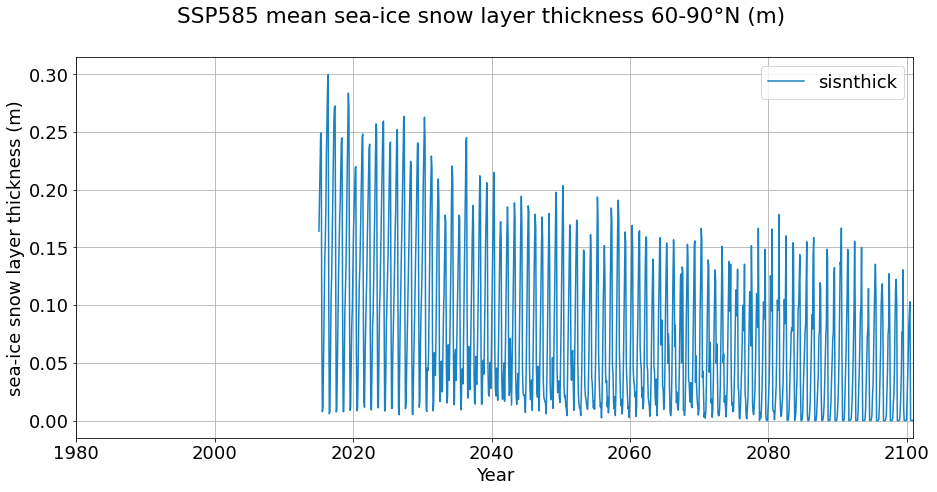

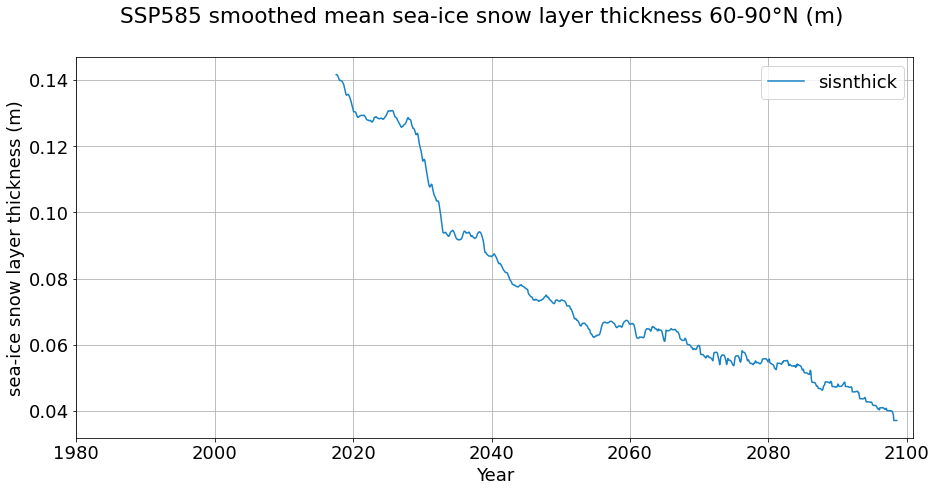

In [3]:
libs.plot.time_series(
    si_arr_weighted_mean,
    title=f'SSP585 mean sea-ice snow layer thickness 60-90°N ({base_units})',
    xattr='time',
    ylabel=time_series_ylabel,
    process=lambda x: x.fillna(0)
)

libs.plot.time_series(
    si_arr_weighted_mean,
    title=f'SSP585 smoothed mean sea-ice snow layer thickness 60-90°N ({base_units})',
    xattr='time',
    ylabel=time_series_ylabel,
    process=lambda x: libs.analysis.smoothed_mean(x.fillna(0))
)

## Monthly variability

### Full region (time)

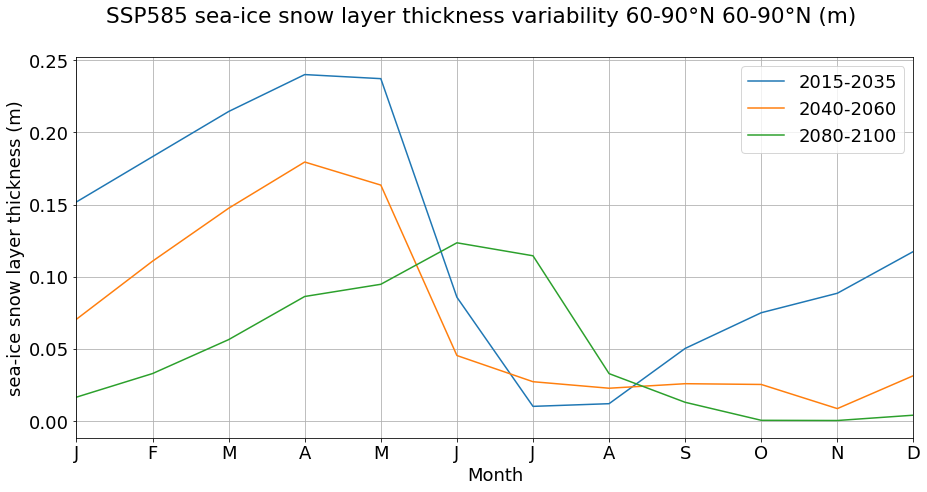

In [4]:
si_arr_monthly = [{ 
    'color': None,
    'data': libs.analysis.monthly_weighted(
        s['ensemble'][0]['data'],
        areacello_w,
        method='mean'
    ),
    'label': s['label']
} for s in ensemble_time_slices]

libs.plot.monthly_variability(
    si_arr_monthly,
    title=f'SSP585 sea-ice snow layer thickness variability 60-90°N 60-90°N ({base_units})',
    ylabel=time_series_ylabel
)

### Regional sea-ice thickness (time)

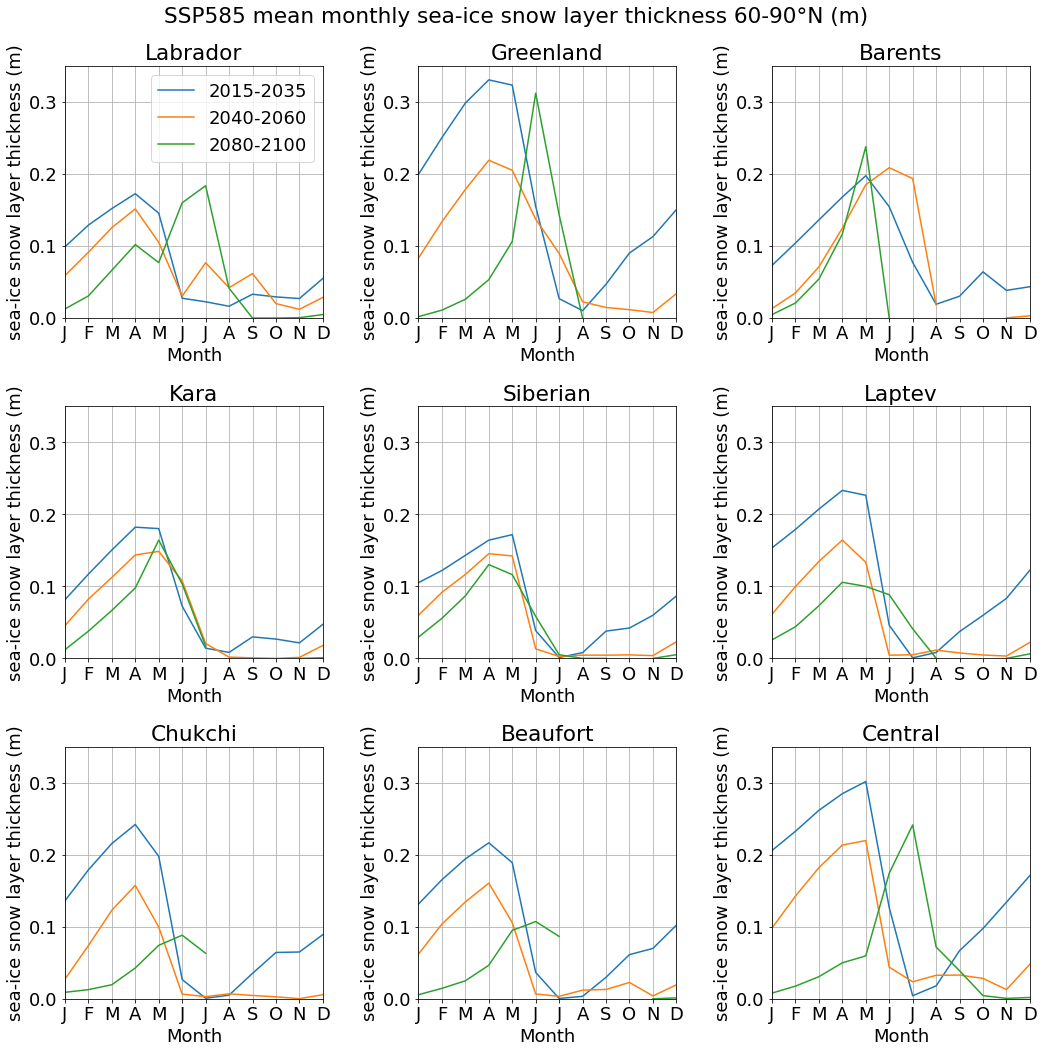

In [5]:
si_arr_slices = [{ 
    'color': None,
    'data': s['ensemble'][0]['data'],
    'label': s['label']
} for s in ensemble_time_slices]

libs.plot.monthly_variability_regional(
    si_arr_slices, 
    title=f'SSP585 mean monthly sea-ice snow layer thickness 60-90°N ({base_units})',
    ylabel=time_series_ylabel,
    mask_type='ocean',
    process=lambda x: libs.analysis.monthly_weighted(x, areacello_w, method='mean'),
    ylim=[0, 0.35]
)

### Full region (spatial)

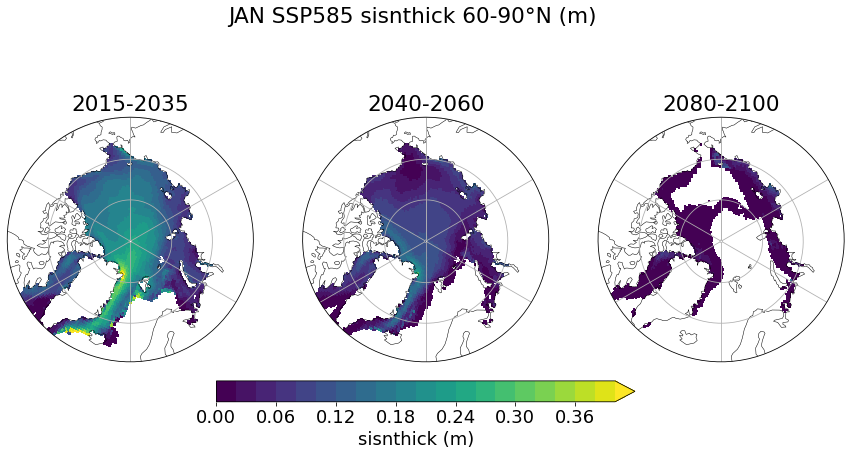

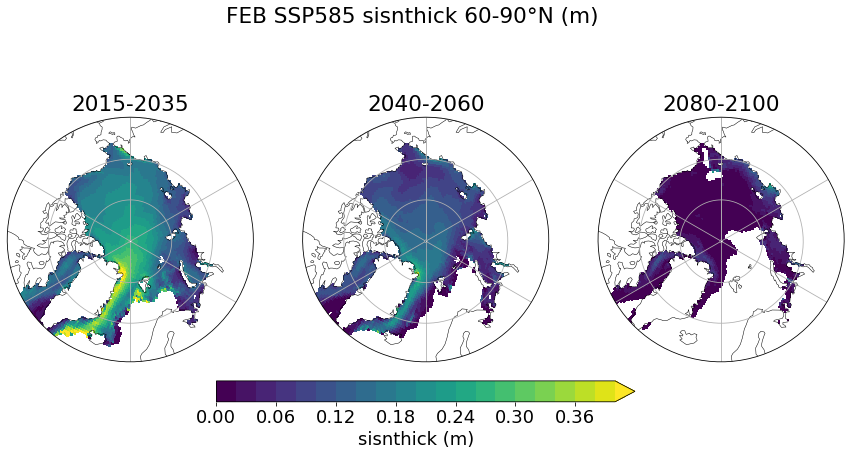

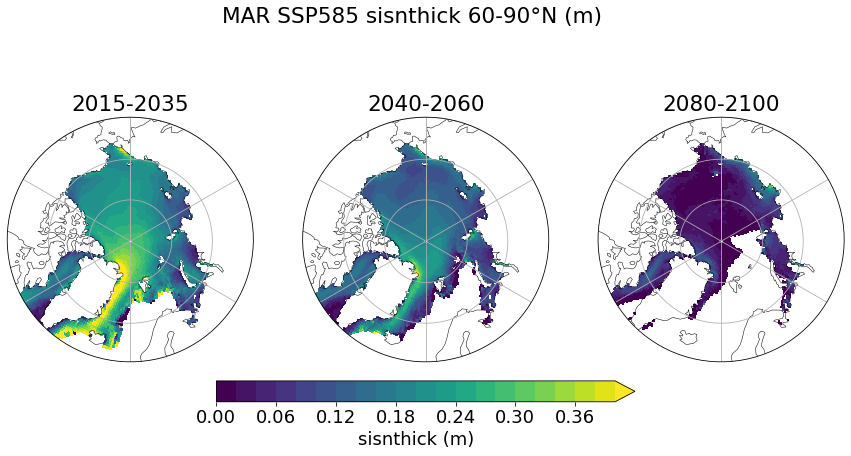

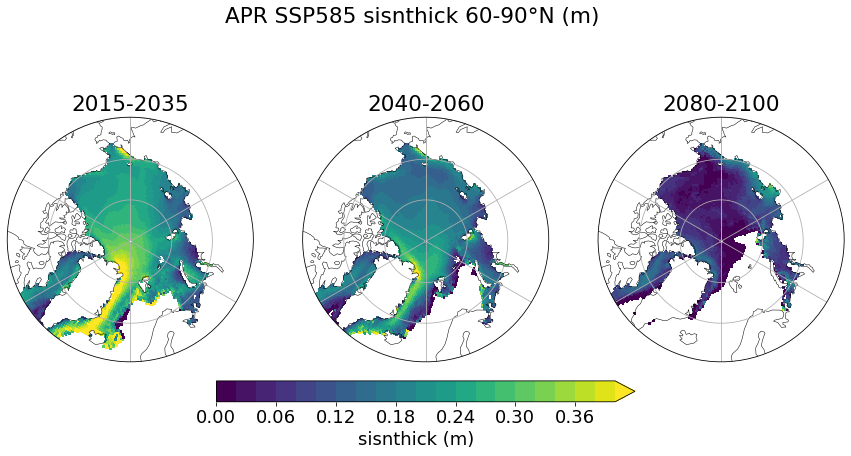

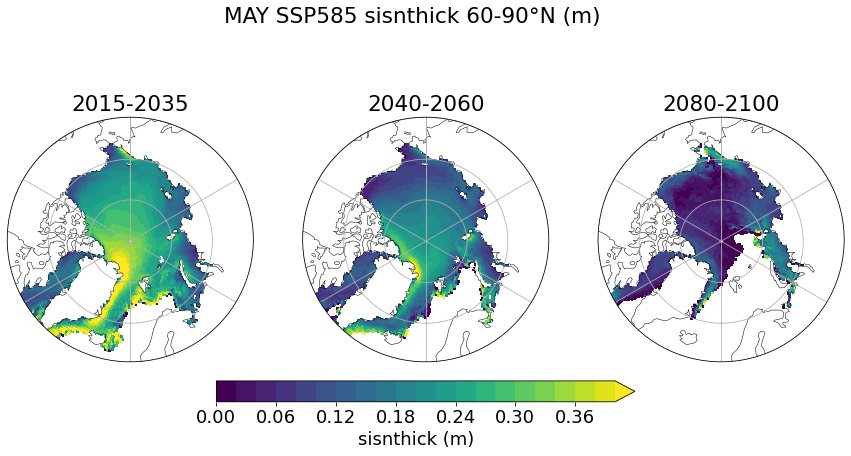

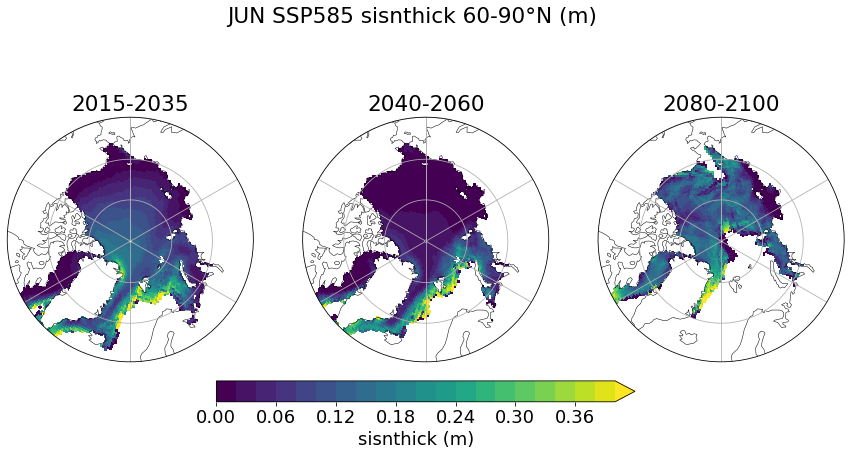

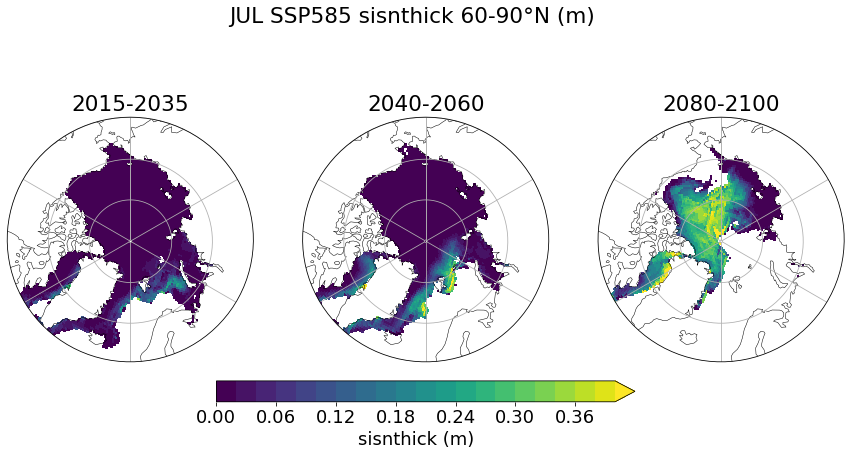

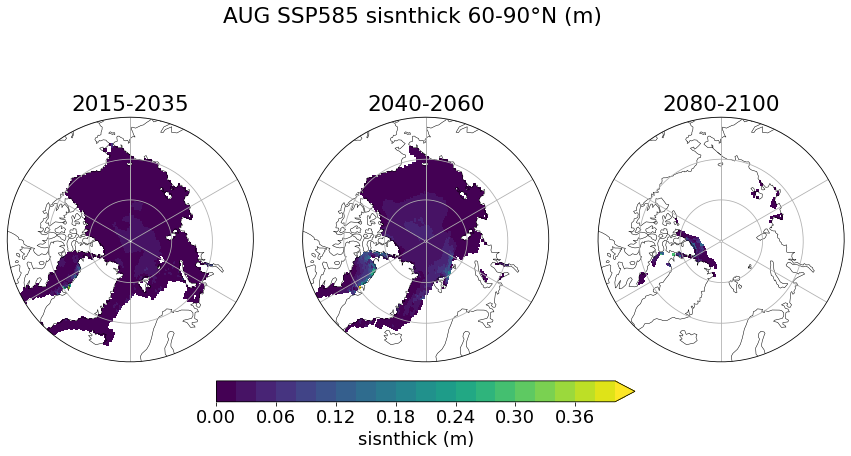

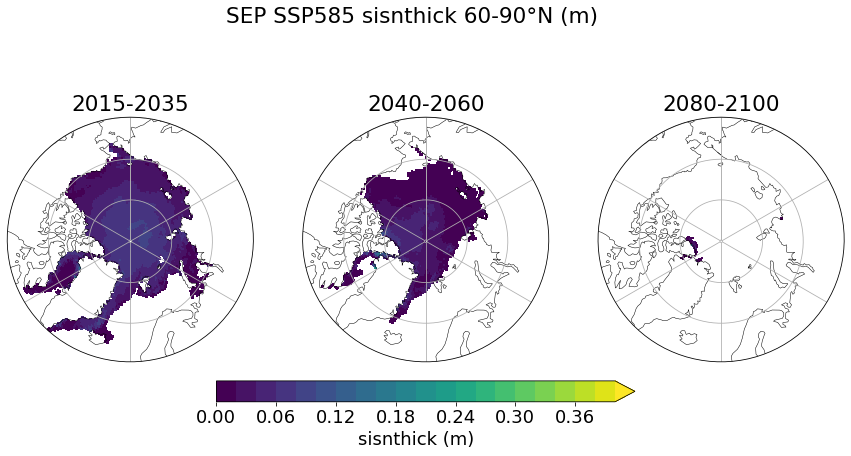

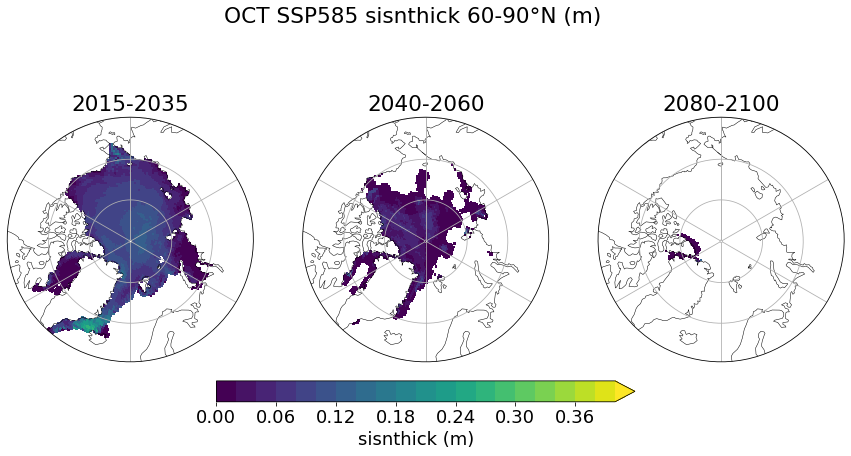

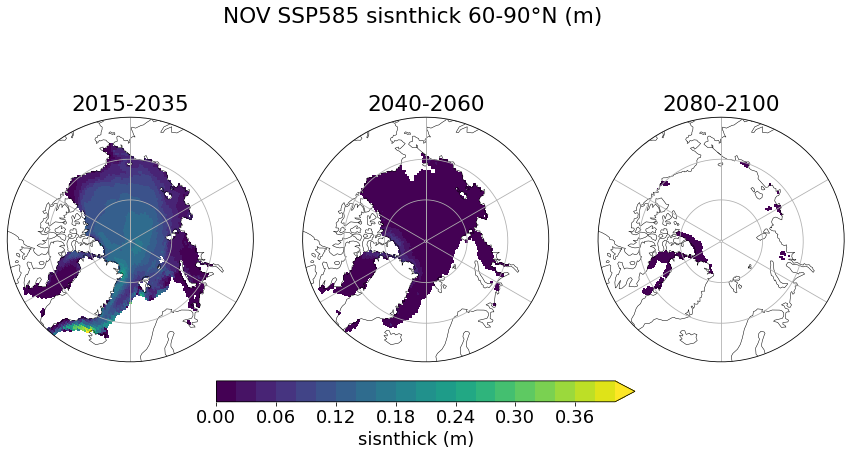

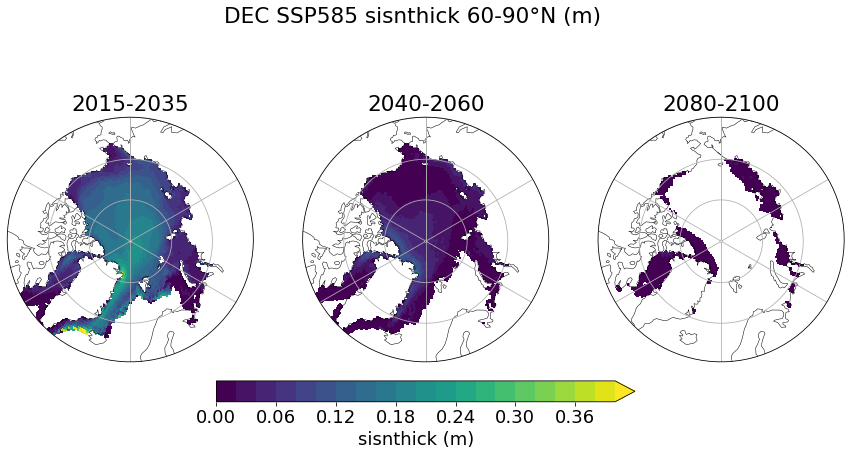

In [6]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

[libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    units=base_units,
    time=m,
    title=time_title
) for m in months];

## Seasonal variability (spatial)

### MAM

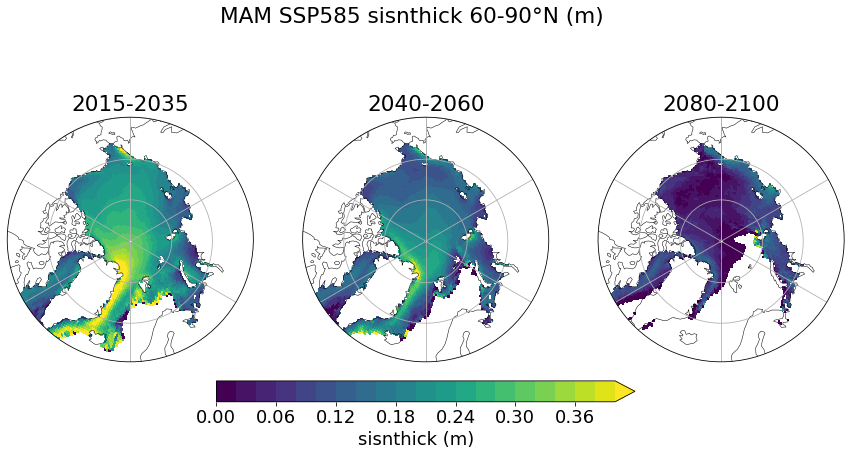

In [7]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    division='season',
    units=base_units,
    time='MAM',
    title=time_title
)

### JJA

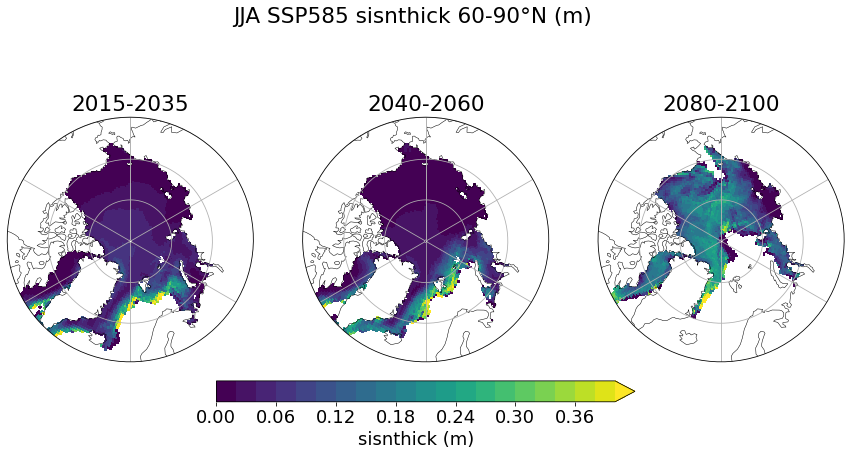

In [8]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    division='season',
    units=base_units,
    time='JJA',
    title=time_title
)

### SON

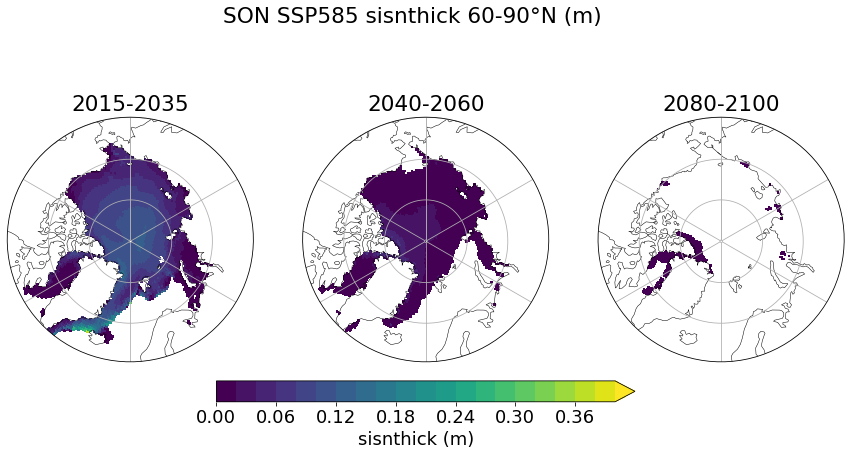

In [9]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    division='season',
    units=base_units,
    time='SON',
    title=time_title
)

### DJF

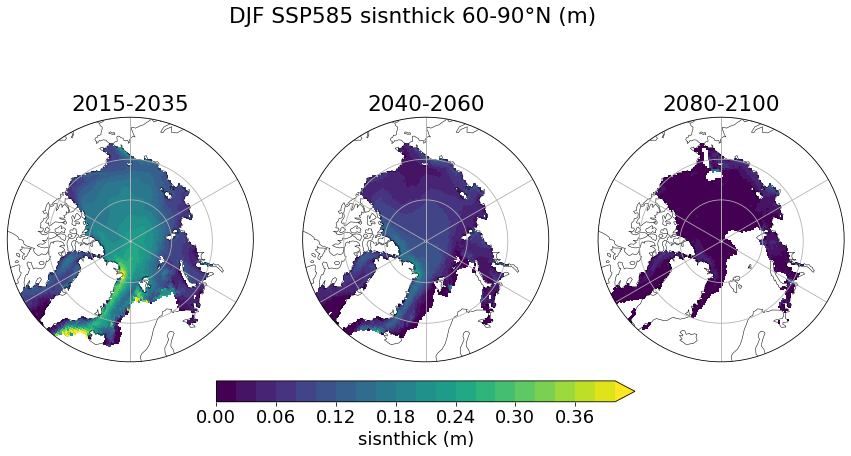

In [10]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    division='season',
    units=base_units,
    time='DJF',
    title=time_title
)